
# 📊 End-to-End Matplotlib Data Visualization (Expert Notebook)

## Goal of this Notebook
This notebook is a **single, end-to-end learning resource** to become **expert in Matplotlib and Data Visualization** using **real data**.

### Key Principles
- ✅ Only **Matplotlib** is used (no Seaborn, no Plotly)
- ✅ All analysis is **strictly aligned with the dataset**
- ✅ Any new metric is **derived explicitly using Pandas**
- ✅ Every plot has **clear learning intent**

By the end of this notebook, you will be able to:
- Design professional-grade visualizations
- Choose the right chart for the right question
- Customize Matplotlib deeply
- Perform real-world exploratory data analysis (EDA)



## 📌 Why Matplotlib?

Matplotlib is the **foundation of Python data visualization**.

### Why every Data Analyst must master it:
- Lowest-level control over plots
- Industry standard (used everywhere)
- Backbone for Seaborn, Pandas plotting, etc.
- Highly customizable
- Perfect for dashboards, reports, research

> **If you master Matplotlib → every other visualization library becomes easy**


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global Matplotlib configuration
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 11


## 🔹 Loading the Dataset (Single Source of Truth)

In [2]:

df = pd.read_csv("Realistic_E-Commerce_Dataset.csv")
df.head()


,user_id,session_id,date,gender,age,location,membership_status,returning_customer,device_type,browser,...,traffic_source,ad_campaign,coupon_used,discount_applied,product_category,wishlist_items,cart_items,avg_session_value,payment_method,purchase
0,1,4174,2023-01-01 00:00:00,Female,45,Australia,Registered,0,Mobile,Edge,...,Referral,Campaign_B,0,0,Sports,4,2,345.40,COD,1
1,2,4507,2023-01-01 01:00:00,Male,34,USA,Guest,0,Mobile,Edge,...,Social,Campaign_C,0,1,Books,9,1,286.72,Debit Card,1
2,3,1860,2023-01-01 02:00:00,Male,48,Canada,Guest,0,Mobile,Safari,...,Organic,Campaign_C,0,0,Electronics,6,2,190.42,UPI,1
3,4,2294,2023-01-01 03:00:00,Female,25,Germany,Registered,0,Desktop,Edge,...,Social,Campaign_B,0,1,Home,7,7,328.79,UPI,1
4,5,2130,2023-01-01 04:00:00,Female,57,UK,Registered,0,Desktop,Chrome,...,Social,Campaign_A,1,0,Clothing,7,1,85.97,NetBanking,1


## 🔹 Dataset Overview

In [3]:

df.shape


(1200, 25)

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             1200 non-null   int64  
 1   session_id          1200 non-null   int64  
 2   date                1200 non-null   object 
 3   gender              1200 non-null   object 
 4   age                 1200 non-null   int64  
 5   location            1200 non-null   object 
 6   membership_status   1200 non-null   object 
 7   returning_customer  1200 non-null   int64  
 8   device_type         1200 non-null   object 
 9   browser             1200 non-null   object 
 10  time_of_day         1200 non-null   object 
 11  time_spent_minutes  1200 non-null   int64  
 12  pages_viewed        1200 non-null   int64  
 13  scroll_depth        1200 non-null   int64  
 14  clicks              1200 non-null   int64  
 15  traffic_source      1200 non-null   object 
 16  ad_cam


## 🔹 Derived Metrics (Using Pandas)

These metrics are **derived**, not assumed.


In [5]:

# Date handling
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M").astype(str)
df["day"] = df["date"].dt.day_name()

# Engagement Score
df["engagement_score"] = (
    df["pages_viewed"] +
    df["clicks"] +
    df["scroll_depth"] / 100
)

# Session category
df["session_type"] = pd.cut(
    df["time_spent_minutes"],
    bins=[0, 2, 5, 10, 30, 100],
    labels=["Very Short", "Short", "Medium", "Long", "Very Long"]
)

# Purchase label
df["converted"] = df["purchase"].map({0: "No Purchase", 1: "Purchased"})



# 📈 Matplotlib Visualizations (20+)

Each visualization answers a **real analytical question**


### 1️⃣ Line Plot – Monthly Sessions


### 📈 Line Chart – When & Why to Use
Use a **line chart** when you want to:
- Track **trends over time**
- Compare **growth or decline**
- Observe **patterns across dates or periods**

👉 Best for: time-based data like *monthly sessions, engagement trends*


In [28]:
monthly_sessions = df.groupby("month").size()
monthly_sessions

month
2023-01    744
2023-02    456
dtype: int64

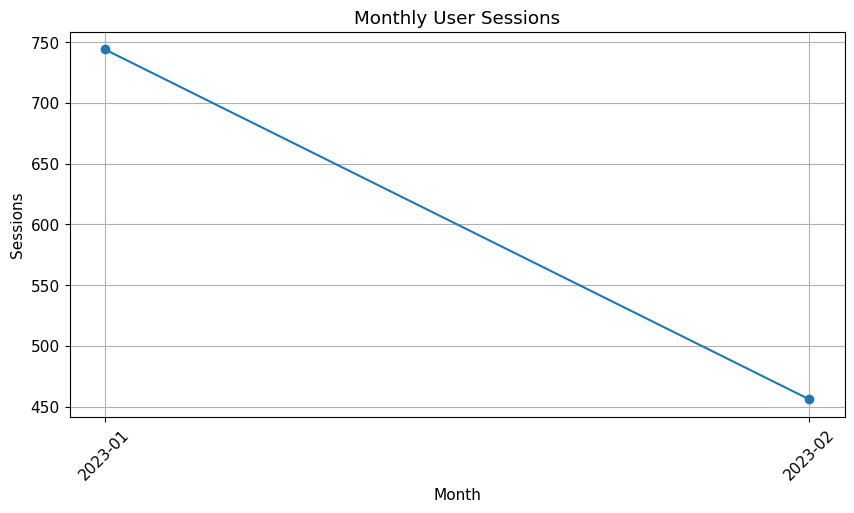

In [6]:

plt.plot(monthly_sessions.index, monthly_sessions.values, marker="o")
plt.title("Monthly User Sessions")
plt.xlabel("Month")
plt.ylabel("Sessions")
plt.xticks(rotation=45)
plt.show()


### 2️⃣ Bar Chart – Purchases by Product Category


### 📊 Bar Chart – When & Why to Use
Use a **bar chart** when you want to:
- Compare values across **categories**
- Identify **highest and lowest performers**
- Show **counts or totals**

👉 Best for: category comparisons like *product category, payment methods*


In [29]:
cat_purchase_0 = df[df["purchase"] == 0].groupby("product_category").size()
cat_purchase_0

product_category
Beauty         92
Books          84
Clothing       95
Electronics    78
Home           94
Sports         81
dtype: int64

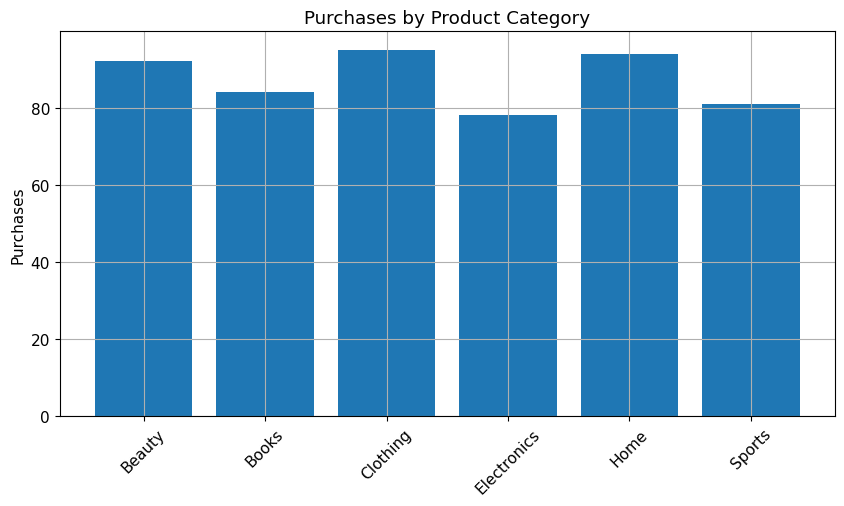

In [30]:

cat_purchase_0 = df[df["purchase"] == 0].groupby("product_category").size()
plt.bar(cat_purchase_0.index, cat_purchase_0.values)
plt.title("Purchases by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Purchases")
plt.show()


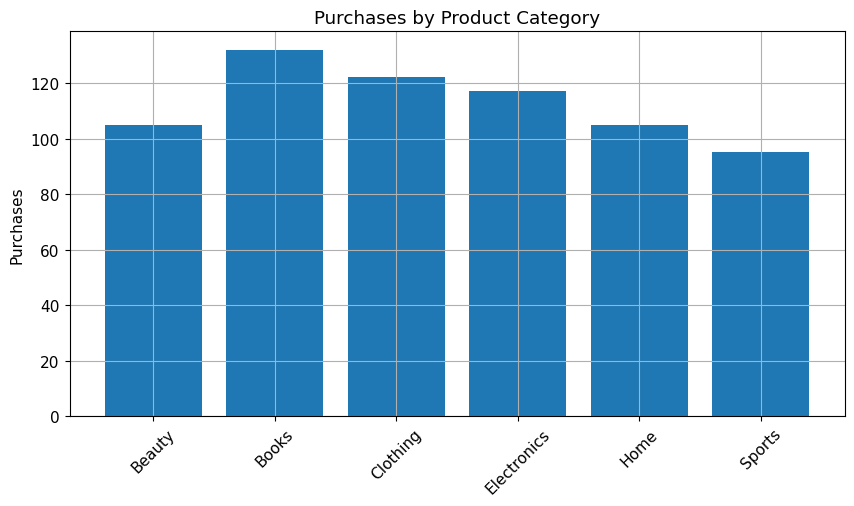

In [7]:

cat_purchase = df[df["purchase"] == 1].groupby("product_category").size()
plt.bar(cat_purchase.index, cat_purchase.values)
plt.title("Purchases by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Purchases")
plt.show()


### 3️⃣ Histogram – Time Spent Distribution


### 📉 Histogram – When & Why to Use
Use a **histogram** when you want to:
- Understand **distribution of data**
- Detect **skewness or spread**
- Identify **outliers**

👉 Best for: numerical data like *time spent, scroll depth*


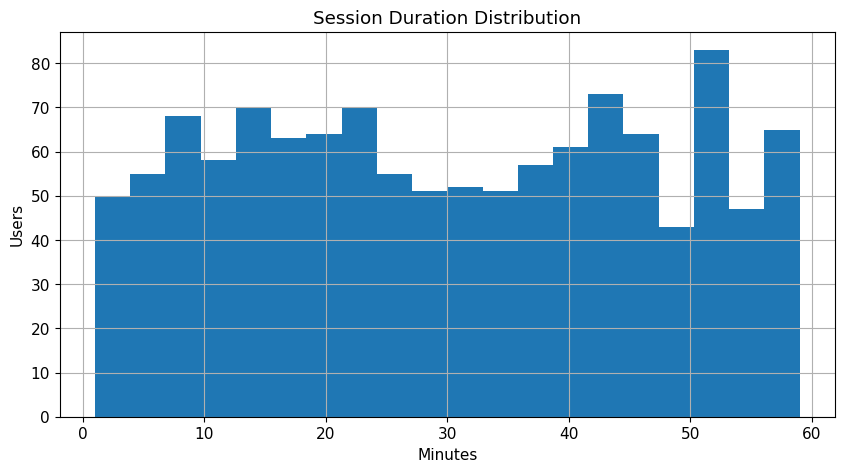

In [8]:

plt.hist(df["time_spent_minutes"], bins=20)
plt.title("Session Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Users")
plt.show()


### 4️⃣ Pie Chart – Device Type Share


### 🥧 Pie Chart – When & Why to Use
Use a **pie chart** when:
- Showing **percentage share**
- Categories are **few**
- Goal is quick proportion comparison

👉 Best for: *device share, coupon usage*


In [31]:
device_counts = df["device_type"].value_counts()
device_counts

device_type
Mobile     708
Desktop    383
Tablet     109
Name: count, dtype: int64

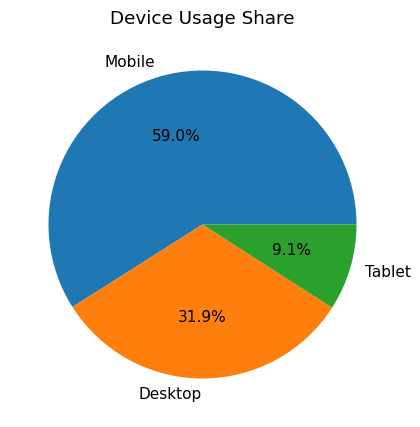

In [9]:
plt.pie(device_counts, labels=device_counts.index, autopct="%1.1f%%")
plt.title("Device Usage Share")
plt.show()


### 5️⃣ Scatter Plot – Time vs Engagement


### 🔵 Scatter Plot – When & Why to Use
Use a **scatter plot** when you want to:
- Study **relationship between two variables**
- Detect **correlation or clusters**
- Identify **patterns or anomalies**

👉 Best for: *engagement vs time spent*


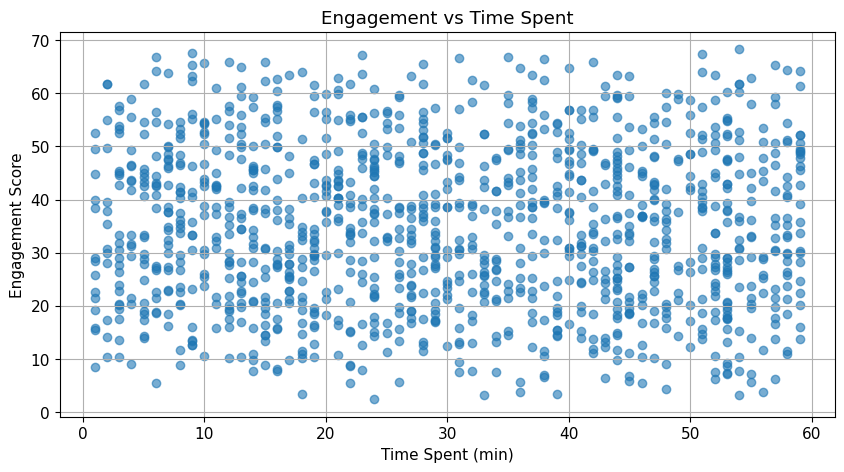

In [10]:

plt.scatter(df["time_spent_minutes"], df["engagement_score"], alpha=0.6)
plt.xlabel("Time Spent (min)")
plt.ylabel("Engagement Score")
plt.title("Engagement vs Time Spent")
plt.show()


### 6️⃣ Box Plot – Time Spent by Purchase


### 📦 Box Plot – When & Why to Use
Use a **box plot** when you want to:
- Compare **distributions**
- Identify **outliers**
- Understand **median & spread**

👉 Best for: *purchase vs non-purchase behavior*


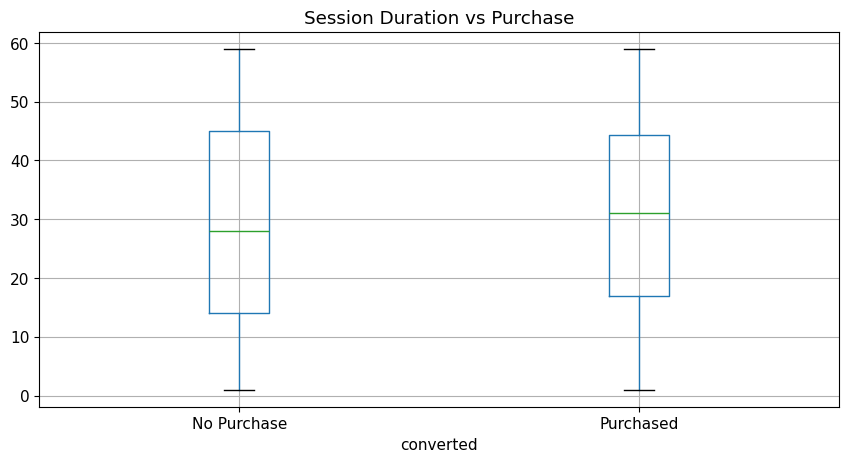

In [11]:

df.boxplot(column="time_spent_minutes", by="converted")
plt.title("Session Duration vs Purchase")
plt.suptitle("")
plt.show()


### 7️⃣ Stacked Bar – Device vs Purchase


### 📊 Stacked Bar Chart – When & Why to Use
Use a **stacked bar chart** when:
- Comparing **sub-categories within categories**
- Showing **composition**
- Understanding **contribution**

👉 Best for: *device vs purchase outcome*


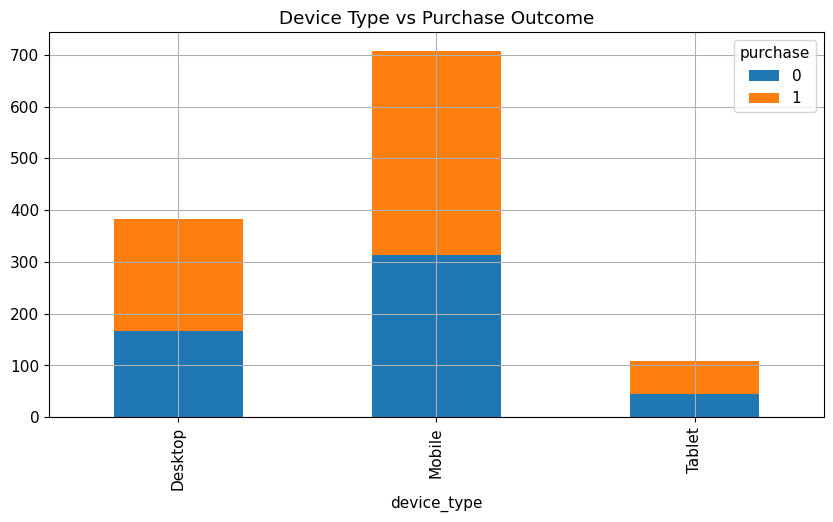

In [12]:

pd.crosstab(df["device_type"], df["purchase"]).plot(kind="bar", stacked=True)
plt.title("Device Type vs Purchase Outcome")
plt.show()


### 9️⃣ Horizontal Bar – Traffic Sources


### 📊 Horizontal Bar Chart – When & Why to Use
Use a **horizontal bar chart** when:
- Category names are **long**
- You want better **readability**
- Ranking matters

👉 Best for: *traffic sources, device usage*


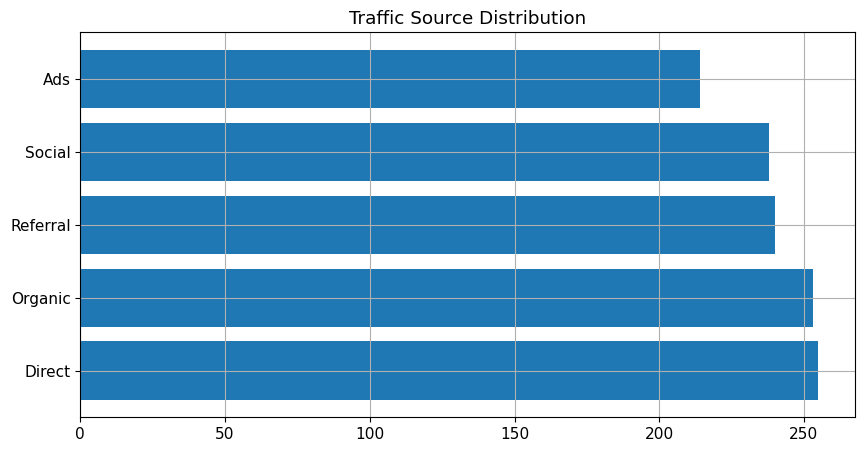

In [14]:

traffic = df["traffic_source"].value_counts()
plt.barh(traffic.index, traffic.values)
plt.title("Traffic Source Distribution")
plt.show()


### 🔟 Multiple Line Plot – Device Session Trends

In [38]:
lst = ['Mobile', 'Desktop', 'Tablet']
for device in  df["device_type"].unique():
    print(df[df["device_type"] == device])
    

      user_id  session_id                date  gender  age   location  \
0           1        4174 2023-01-01 00:00:00  Female   45  Australia   
1           2        4507 2023-01-01 01:00:00    Male   34        USA   
2           3        1860 2023-01-01 02:00:00    Male   48     Canada   
5           6        2095 2023-01-01 05:00:00    Male   42         UK   
6           7        4772 2023-01-01 06:00:00    Male   26    Germany   
...       ...         ...                 ...     ...  ...        ...   
1189     1190        4994 2023-02-19 13:00:00    Male   60  Australia   
1191     1192        3841 2023-02-19 15:00:00  Female   54      India   
1193     1194        3094 2023-02-19 17:00:00    Male   41    Germany   
1196     1197        3286 2023-02-19 20:00:00  Female   34         UK   
1197     1198        2079 2023-02-19 21:00:00    Male   21         UK   

     membership_status  returning_customer device_type  browser  ...  \
0           Registered                   0      Mob

In [39]:
df[df["device_type"] == "Mobile"].groupby("month").size()

month
2023-01    432
2023-02    276
dtype: int64

In [40]:
df[df["device_type"] == "Desktop"].groupby("month").size()

month
2023-01    234
2023-02    149
dtype: int64

In [41]:
df[df["device_type"] == "Tablet"].groupby("month").size()

month
2023-01    78
2023-02    31
dtype: int64

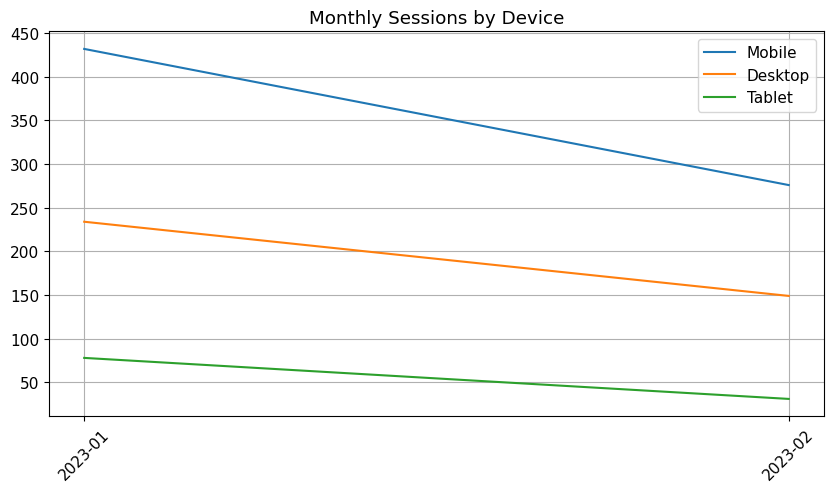

In [15]:

for device in df["device_type"].unique():
    temp = df[df["device_type"] == device].groupby("month").size()
    plt.plot(temp.index, temp.values, label=device)

plt.legend()
plt.title("Monthly Sessions by Device")
plt.xticks(rotation=45)
plt.show()


### 1️⃣1️⃣ Histogram Comparison – Purchase vs No Purchase


### 📉 Histogram – When & Why to Use
Use a **histogram** when you want to:
- Understand **distribution of data**
- Detect **skewness or spread**
- Identify **outliers**

👉 Best for: numerical data like *time spent, scroll depth*


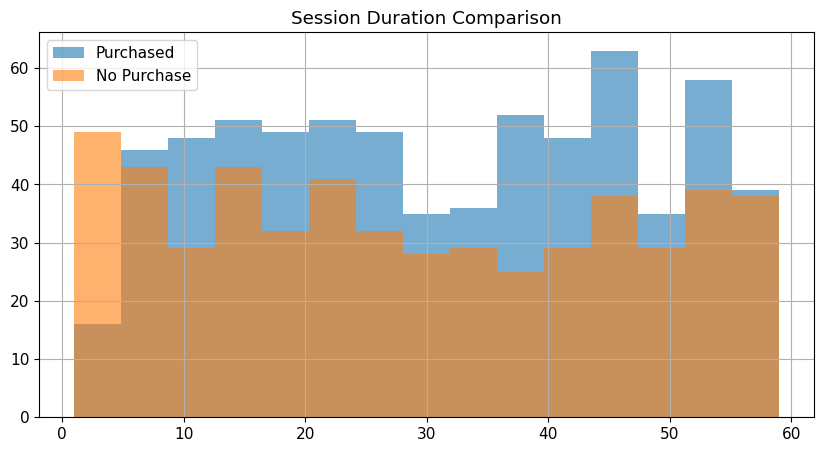

In [16]:

plt.hist(df[df["purchase"]==1]["time_spent_minutes"], bins=15, alpha=0.6, label="Purchased")
plt.hist(df[df["purchase"]==0]["time_spent_minutes"], bins=15, alpha=0.6, label="No Purchase")
plt.legend()
plt.title("Session Duration Comparison")
plt.show()


### 1️⃣2️⃣ Bar Chart – Session Types


### 📊 Bar Chart – When & Why to Use
Use a **bar chart** when you want to:
- Compare values across **categories**
- Identify **highest and lowest performers**
- Show **counts or totals**

👉 Best for: category comparisons like *product category, payment methods*


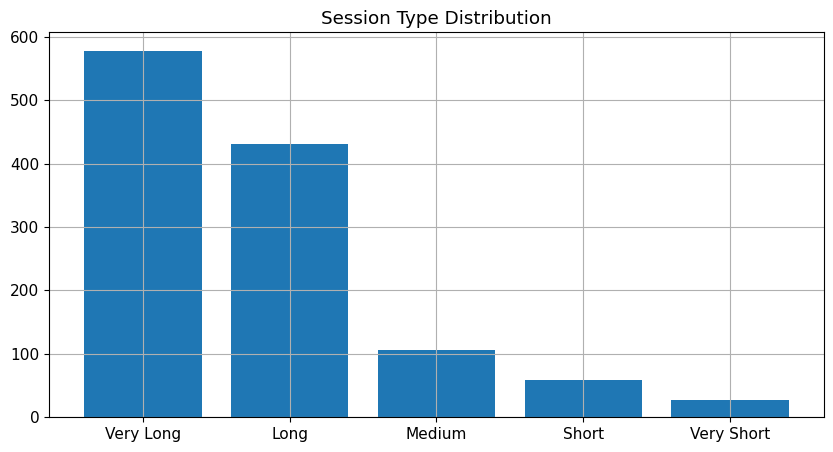

In [17]:

session_counts = df["session_type"].value_counts()
plt.bar(session_counts.index.astype(str), session_counts.values)
plt.title("Session Type Distribution")
plt.show()


### 1️⃣4️⃣ Bar Chart – Payment Methods


### 📊 Bar Chart – When & Why to Use
Use a **bar chart** when you want to:
- Compare values across **categories**
- Identify **highest and lowest performers**
- Show **counts or totals**

👉 Best for: category comparisons like *product category, payment methods*


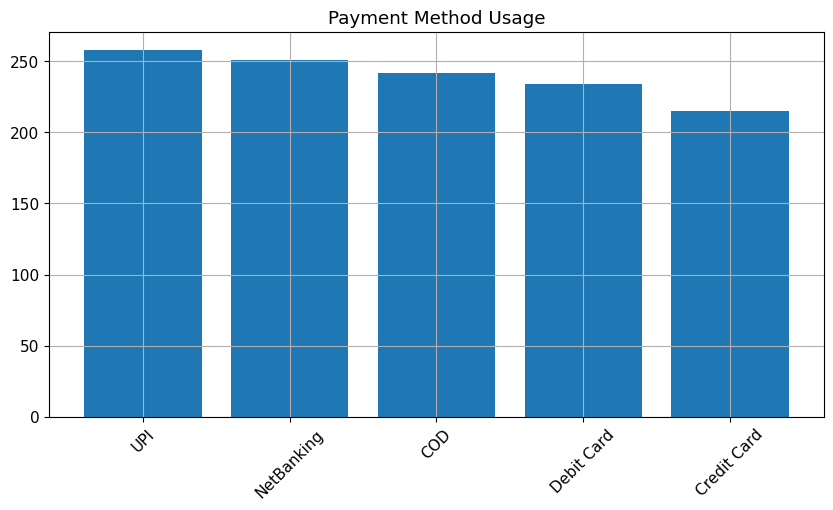

In [19]:

payment = df["payment_method"].value_counts()
plt.bar(payment.index, payment.values)
plt.title("Payment Method Usage")
plt.xticks(rotation=45)
plt.show()


### 1️⃣6️⃣ Box Plot – Engagement by Device


### 📦 Box Plot – When & Why to Use
Use a **box plot** when you want to:
- Compare **distributions**
- Identify **outliers**
- Understand **median & spread**

👉 Best for: *purchase vs non-purchase behavior*


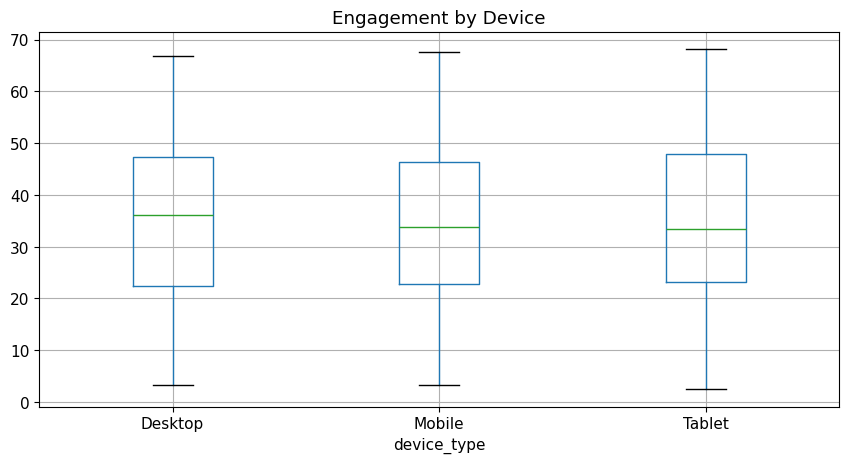

In [21]:

df.boxplot(column="engagement_score", by="device_type")
plt.suptitle("")
plt.title("Engagement by Device")
plt.show()


### 1️⃣8️⃣ Line Plot – Sessions by Day


### 📈 Line Chart – When & Why to Use
Use a **line chart** when you want to:
- Track **trends over time**
- Compare **growth or decline**
- Observe **patterns across dates or periods**

👉 Best for: time-based data like *monthly sessions, engagement trends*


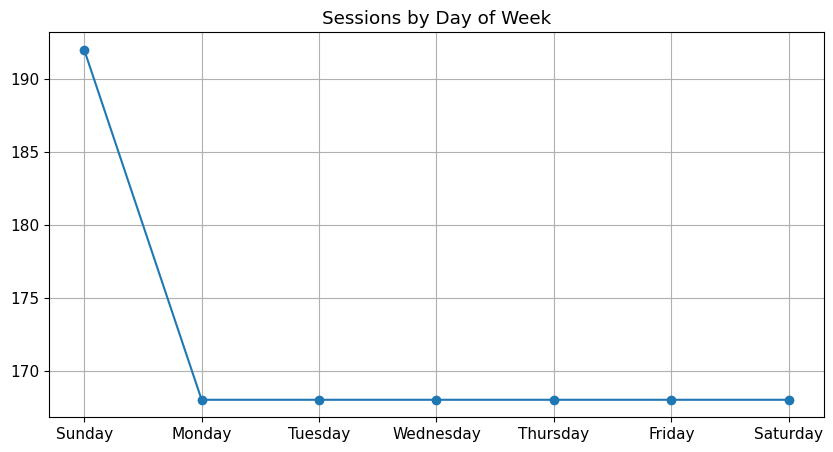

In [23]:

day_counts = df["day"].value_counts()
plt.plot(day_counts.index, day_counts.values, marker="o")
plt.title("Sessions by Day of Week")
plt.show()


### 2️⃣0️⃣ Bar Chart – Coupon Usage


### 📊 Bar Chart – When & Why to Use
Use a **bar chart** when you want to:
- Compare values across **categories**
- Identify **highest and lowest performers**
- Show **counts or totals**

👉 Best for: category comparisons like *product category, payment methods*


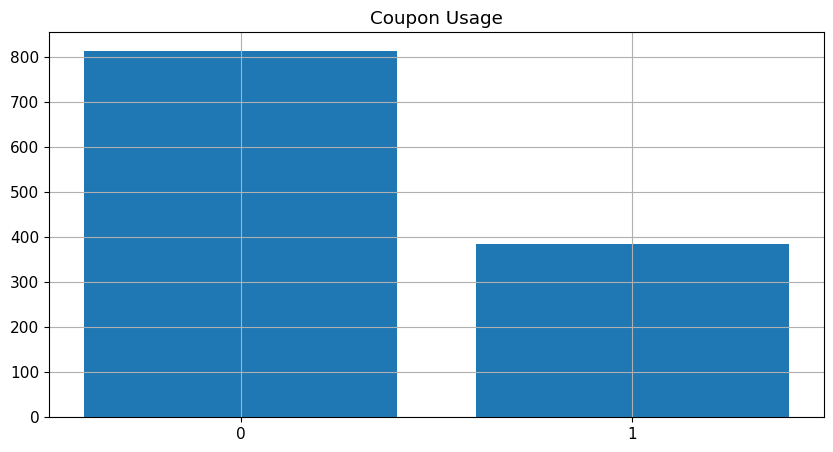

In [25]:

coupon = df["coupon_used"].value_counts()
plt.bar(coupon.index.astype(str), coupon.values)
plt.title("Coupon Usage")
plt.show()



# 🎨 Matplotlib Customization Essentials

## Key Customization Areas
- Figure size
- Colors
- Markers
- Line styles
- Transparency (alpha)
- Legends
- Titles, labels



### 📈 Line Chart – When & Why to Use
Use a **line chart** when you want to:
- Track **trends over time**
- Compare **growth or decline**
- Observe **patterns across dates or periods**

👉 Best for: time-based data like *monthly sessions, engagement trends*


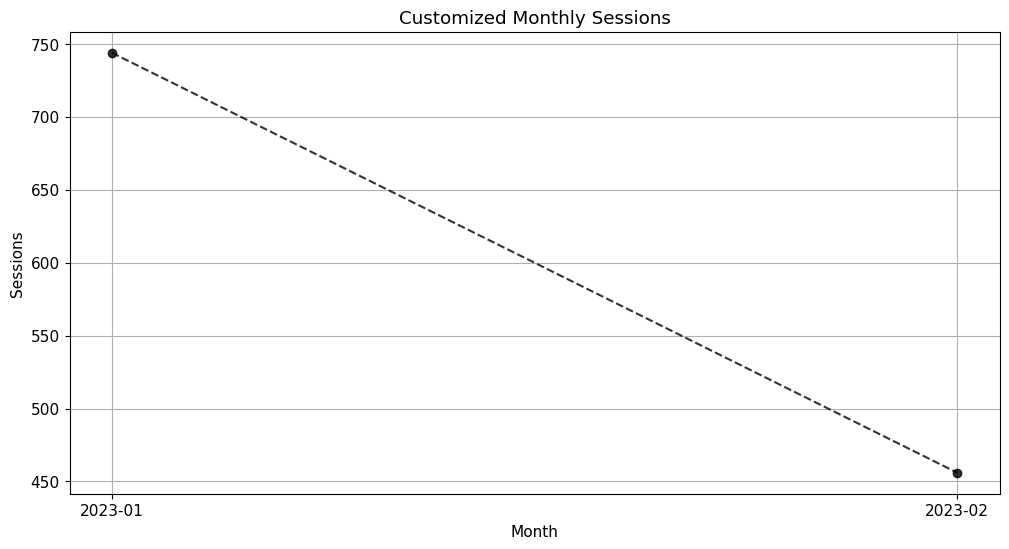

In [26]:

plt.figure(figsize=(12,6))
plt.plot(monthly_sessions.index, monthly_sessions.values,
         color="black", linestyle="--", marker="o", alpha=0.8)
plt.title("Customized Monthly Sessions")
plt.xlabel("Month")
plt.ylabel("Sessions")
plt.grid(True)
plt.show()
